In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the data
data = pd.read_csv("back_order.csv")

In [3]:
data.head()

,Unnamed: 0,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,3352105,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
1,1,3403239,6.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
2,2,3286560,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
3,3,3299078,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
4,4,3314098,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,...,0.0,0.95,0.94,0.0,No,No,No,Yes,No,Yes


In [4]:
# droping first two columns
data=data.drop(['Unnamed: 0','sku'], axis=1)

In [5]:
backorder=data.copy()

In [6]:
backorder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 22 columns):
national_inv         9688 non-null float64
lead_time            8473 non-null float64
in_transit_qty       9688 non-null float64
forecast_3_month     9688 non-null float64
forecast_6_month     9688 non-null float64
forecast_9_month     9688 non-null float64
sales_1_month        9688 non-null float64
sales_3_month        9688 non-null float64
sales_6_month        9688 non-null float64
sales_9_month        9688 non-null float64
min_bank             9688 non-null float64
potential_issue      9688 non-null object
pieces_past_due      9688 non-null float64
perf_6_month_avg     9688 non-null float64
perf_12_month_avg    9688 non-null float64
local_bo_qty         9688 non-null float64
deck_risk            9688 non-null object
oe_constraint        9688 non-null object
ppap_risk            9688 non-null object
stop_auto_buy        9688 non-null object
rev_stop             9688 non-null obj

In [7]:
#Cheacking null values
backorder.isnull().sum()

national_inv            0
lead_time            1215
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [8]:
# filling the null value with median
mean=backorder['lead_time'].median()
backorder['lead_time'].fillna(mean,inplace=True)


In [11]:
# cheacking the column name having 2 unique value
for i in backorder.columns:
    size=len(np.unique(backorder[i].values))
    print(i,"   ",size)
   

national_inv     1096
lead_time     24
in_transit_qty     472
forecast_3_month     990
forecast_6_month     1246
forecast_9_month     1421
sales_1_month     609
sales_3_month     1008
sales_6_month     1317
sales_9_month     1501
min_bank     581
potential_issue     2
pieces_past_due     290
perf_6_month_avg     101
perf_12_month_avg     102
local_bo_qty     90
deck_risk     2
oe_constraint     2
ppap_risk     2
stop_auto_buy     2
rev_stop     2
went_on_backorder     2


In [12]:
#  dividing data
X=backorder.drop('went_on_backorder',axis=1)
y=backorder['went_on_backorder']

In [19]:
categorical=[]
for i in X.columns:
    size=len(np.unique(X[i].values))
    if size==2:
        categorical.append(i)

In [21]:
X_inputs=pd.get_dummies(X,columns=categorical,drop_first=True)

In [22]:
X_inputs.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,potential_issue_Yes,deck_risk_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,rev_stop_Yes
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,0,1,0
1,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,0,1,0
2,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.70,0.73,0.0,0,0,0,0,1,0
3,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,2.0,2.0,...,0.0,0.70,0.73,0.0,0,0,0,0,1,0
4,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.95,0.94,0.0,0,0,0,0,1,0


In [24]:
# doing normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scale=scaler.fit_transform(X_inputs)

In [31]:
X_scale

array([[-0.07388312,  0.14906536, -0.08545455, ..., -0.38081271,
         0.2178637 , -0.03371522],
       [-0.07262749,  0.14906536, -0.08545455, ..., -0.38081271,
         0.2178637 , -0.03371522],
       [-0.07388312, -0.96395602, -0.08545455, ..., -0.38081271,
         0.2178637 , -0.03371522],
       ...,
       [-0.04667791,  0.14906536, -0.01238421, ..., -0.38081271,
         0.2178637 , -0.03371522],
       [-0.07534802,  0.14906536, -0.08545455, ..., -0.38081271,
         0.2178637 , -0.03371522],
       [-0.07388312, -0.96395602, -0.08545455, ...,  2.62596278,
         0.2178637 , -0.03371522]])

In [32]:
# cheacking the coreelation
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=X_scale
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=X_inputs.columns


In [33]:
vif

,VIF,features
0,5.435949,national_inv
1,1.038167,lead_time
2,1.789883,in_transit_qty
3,701.922723,forecast_3_month
4,7084.289916,forecast_6_month
5,5841.248426,forecast_9_month
6,363.813391,sales_1_month
7,2086.348643,sales_3_month
8,7545.087526,sales_6_month
9,4313.476391,sales_9_month


vif value shoud not more than 5

Text(0.5, 1.0, 'Explained Variance')

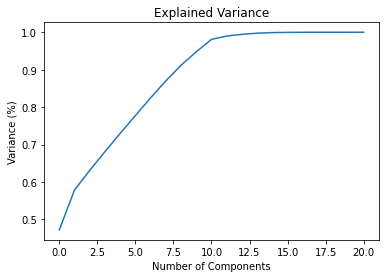

In [41]:
# performing pca
from sklearn.decomposition import PCA
pca=PCA()
compo=pca.fit_transform(X_scale)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plot.title('Explained Variance')


we can see there not changein variance after 11 componants

In [43]:
# taking only 11 componanat
pca=PCA(11)
principal_comp=pca.fit_transform(X_scale)
X_new=pd.DataFrame(principal_comp,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11'])


In [44]:
X_new.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11
0,-0.170824,2.820473,-1.370426,-0.232497,0.206568,-0.284101,0.814427,-0.421360,-1.109213,0.133798,-0.062387
1,-0.170144,2.820489,-1.370427,-0.232514,0.206549,-0.284104,0.814416,-0.421380,-1.109226,0.133796,-0.062347
2,-0.132685,-0.891531,-0.676679,0.133068,-0.143596,-0.069085,0.289671,-0.058624,0.246767,-0.503353,-0.146139
3,-0.133071,-0.739009,-0.014035,-0.365499,0.096557,-0.103107,0.155998,-0.237321,-0.145967,0.008490,-0.093221
4,-0.134088,-0.747246,-0.010909,-0.365785,0.096324,-0.102678,0.154500,-0.236880,-0.143745,0.008175,-0.093161


In [45]:
# cheacking the colinearity
variables=X_new.values
vif1=pd.DataFrame()
vif1['VIF']=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif1['features']=X_new.columns

In [46]:
vif1

,VIF,features
0,1.0,PC-1
1,1.0,PC-2
2,1.0,PC-3
3,1.0,PC-4
4,1.0,PC-5
5,1.0,PC-6
6,1.0,PC-7
7,1.0,PC-8
8,1.0,PC-9
9,1.0,PC-10


In [72]:
# cheacking balace inbalance data
y.value_counts()

No     7000
Yes    2688
Name: went_on_backorder, dtype: int64

Looks like balace data

In [73]:
# now we willl splite the data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_new,y,test_size=0.20,random_state=42)

In [76]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
rf = RandomForestClassifier()

rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [78]:
rf.score(xtrain,ytrain)

0.9966451612903225

In [79]:
rf.score(xtest,ytest)

0.8116615067079463

In [80]:
pd.DataFrame(X_new.columns,(rf.feature_importances_))

,0
0.102120,PC-1
0.080616,PC-2
0.069951,PC-3
0.082677,PC-4
0.083248,PC-5
0.070313,PC-6
0.059226,PC-7
0.088675,PC-8
0.069039,PC-9
0.091233,PC-10


In [81]:
# cheacking for logistice regression
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)


0.7230967741935483

In [82]:
lr.score(xtest,ytest)

0.7223942208462333

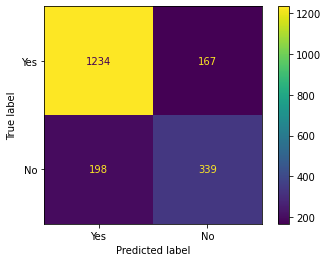

In [85]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf,xtest,ytest,values_format='d',display_labels=['Yes','No'])

In [94]:
# parameter tunning
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(rf,{'max_depth': [3,4,5,8,10,12],
                      'n_estimators':[50,100,150,200],
                       'criterion':['gini','entropy'],
                      'min_samples_leaf' : range(1,5),
                      'min_samples_split': range(2,5),
                       'max_features' : ['auto','log2']},cv=3,n_jobs =-1,verbose = 3)

In [95]:
grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 51.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 8, 10, 12],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': [50, 100, 150, 200]},
             verbose=3)

In [96]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [99]:
rf = RandomForestClassifier(criterion='gini',max_depth=12,max_features='auto',min_samples_leaf=3,min_samples_split=2,
                        n_estimators=50   )

rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)

0.9169032258064516

In [104]:
rf.score(xtest,ytest)*float(100)

81.94014447884416

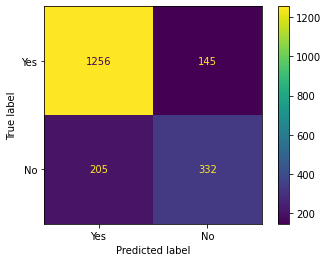

In [103]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf,xtest,ytest,values_format='d',display_labels=['Yes','No'])

In [88]:
from xgboost import XGBClassifier
xgb=XGBClassifier(objective='binary:logistic',max_depth=3,gamma=0,learning_rate=0.3,seed=42,min_child_weight=0)
xgb.fit(xtrain,ytrain,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(xtest,ytest)],verbose=True)

[0]	validation_0-aucpr:0.50261
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.52657
[2]	validation_0-aucpr:0.53859
[3]	validation_0-aucpr:0.55088
[4]	validation_0-aucpr:0.55489
[5]	validation_0-aucpr:0.55668
[6]	validation_0-aucpr:0.57117
[7]	validation_0-aucpr:0.57303
[8]	validation_0-aucpr:0.57757
[9]	validation_0-aucpr:0.58426
[10]	validation_0-aucpr:0.58544
[11]	validation_0-aucpr:0.59499
[12]	validation_0-aucpr:0.59789
[13]	validation_0-aucpr:0.60301
[14]	validation_0-aucpr:0.60836
[15]	validation_0-aucpr:0.60851
[16]	validation_0-aucpr:0.61280
[17]	validation_0-aucpr:0.61612
[18]	validation_0-aucpr:0.61359
[19]	validation_0-aucpr:0.61935
[20]	validation_0-aucpr:0.62553
[21]	validation_0-aucpr:0.62672
[22]	validation_0-aucpr:0.63238
[23]	validation_0-aucpr:0.63512
[24]	validation_0-aucpr:0.64248
[25]	validation_0-aucpr:0.64006
[26]	validation_0-aucpr:0.63943
[27]	validation_0-aucpr:0.64073
[28]	validation_0-aucpr:0.64070
[29]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [89]:
xgb.score(xtrain,ytrain)

0.8132903225806452

In [90]:
xgb.score(xtest,ytest)

0.7930856553147575

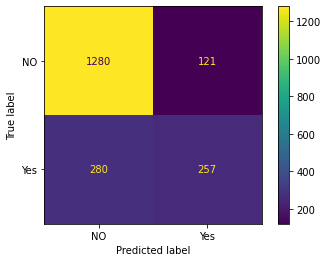

In [93]:
# ploting confusion matrix
plot_confusion_matrix(xgb,xtest,ytest,values_format='d',display_labels=['NO','Yes'])